# Lista 5 - Algorytm genetyczny

In [1]:
from numpy.random import randint
from numpy.random import rand
import matplotlib.pyplot as plt
import numpy as np

func = input("Podaj funkcję: ")
def input_function(x):
    x = x[0]
    result = eval(func)
    return result

## Dekodowanie

In [2]:
def dekodowanie(granice,ilosc_bitow,zakodowana_wartosc):
    zdekodowana = list()
    for i in range(len(granice)):
        start,stop = i*ilosc_bitow,(i+1)*ilosc_bitow
        substring = zakodowana_wartosc[start:stop]
        chars = ''.join([str(i) for i in substring])
        integer = int(chars,2)
        zakres_wartosci_skalowanie =granice[0]+(integer/((2**ilosc_bitow)-1))*(granice[1]-granice[0])
        zdekodowana.append(zakres_wartosci_skalowanie)
    return zdekodowana

## Selekcja

In [3]:
def selekcja(populacja,wartosci, k_step=3):
    selekcja_losowa = randint(len(populacja))
    for i in range(0, len(populacja), k_step-1):
        if wartosci[i] > wartosci[selekcja_losowa]:
            return populacja[i]
    return populacja[selekcja_losowa]


## Krzyzowanie

In [4]:
def krzyzowanie(rodzic1,rodzic2,krzyzowanie_parametr):
    dziecko1, dziecko2 = rodzic1.copy(), rodzic2.copy()
    if rand() < krzyzowanie_parametr:
        punkt_krzyzowania = randint(1,len(rodzic1)-2)
        dziecko1 = rodzic1[:punkt_krzyzowania] + rodzic2[punkt_krzyzowania:]
        dziecko2 = rodzic2[:punkt_krzyzowania] + rodzic1[punkt_krzyzowania:]
    return [dziecko1,dziecko2]

## Mutacja

In [5]:
def mutacja(zakodowana_wartosc,mutacja_parametr):
    for i in range(len(zakodowana_wartosc)):
        if rand() < mutacja_parametr:
            zakodowana_wartosc[i] = 1 - zakodowana_wartosc[i]

## Algorytm genetyczny

In [6]:
def algorytm_genetyczny(zadana_funkcja,granice,ilosc_bitow,ilosc_iteracji,ilosc_populacji,krzyzowanie_parametr,mutacja_parametr):
    populacja = [[randint(2) for i in range(len(granice)*ilosc_bitow)] for j in range(ilosc_populacji)]
    print(populacja)
    x = populacja.copy()

    wartosci=[]
    zdekodowana_populacja=[]
    najlepsze_wartosci, najlepsze_populacje = 0, zadana_funkcja(dekodowanie(granice,ilosc_bitow,populacja[0]))
    populacja_do_plota = []
    for generacja in range(ilosc_iteracji):
        zdekodowana_populacja = [dekodowanie(granice,ilosc_bitow,osobnik) for osobnik in populacja]
        wartosci = [zadana_funkcja(osobnik) for osobnik in zdekodowana_populacja]
        for i in range(ilosc_populacji):
            if wartosci[i] < najlepsze_populacje:
                najlepsze_wartosci, najlepsze_populacje = populacja[i], wartosci[i]
                populacja_do_plota.append(populacja[i])
                print( f"Generacja: {generacja} Najlepsza wartość f({zdekodowana_populacja[i][0]}) = ", wartosci[i])
        wybrani_rodzice = [selekcja(populacja,wartosci) for i in range(ilosc_populacji)]
        potomstwo = list()
        for i in range(0,ilosc_populacji,2):
            rodzic1, rodzic2 = wybrani_rodzice[i], wybrani_rodzice[i+1]
            for dziecko in krzyzowanie(rodzic1,rodzic2,krzyzowanie_parametr):
                mutacja(dziecko,mutacja_parametr)
                potomstwo.append(dziecko)
        populacja = potomstwo
    plt.figure()
    plt.title(f"Algorytm genetyczny dla funkcji {func}")
    plt.ylabel("Wartość funkcji")
    plt.xlabel("Zdekodowana wartość X")


    dekoded = [dekodowanie(granice, ilosc_bitow, osobnik) for osobnik in x]
    plt.plot([wartosc[0] for wartosc in dekoded], [zadana_funkcja(osobnik) for osobnik in dekoded],'o',color='black')
    dekoded = [dekodowanie(granice,ilosc_bitow,osobnik) for osobnik in populacja_do_plota]
    plt.plot([wartosc[0] for wartosc in dekoded], [zadana_funkcja(osobnik) for osobnik in dekoded],'o',color='red')
    x_axis = np.arange(granice[0],granice[1],0.1)

    x = np.arange(granice[0],granice[1],0.1)
    plt.plot(x_axis,eval(func))
    return [najlepsze_wartosci, najlepsze_populacje]
                

[[0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0], [0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0], [1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0], [1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1], [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0], [1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0], [1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0], [1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 

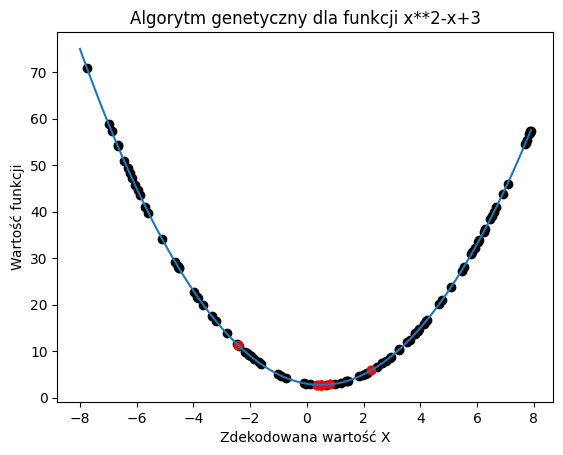

In [7]:
granice =[-8,8]
ilosc_iteracji = 100
ilosc_bitow = 16
ilosc_populacji = 100
krzyzowanie_parametr = 0.5
mutacja_parametr = 0.4
najlepszy,wynik = algorytm_genetyczny(input_function,granice,ilosc_bitow,ilosc_iteracji,ilosc_populacji,krzyzowanie_parametr,mutacja_parametr)
print('Najlepszy wynik dla')
decoded = dekodowanie(granice, ilosc_bitow, najlepszy)
print('f(%s) = %f' % (decoded[0], wynik))

# Zmiana ilości iteracji

[[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1], [0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0], [0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1], [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0], [0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1], [1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0], [1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0], [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 1, 0, 0, 

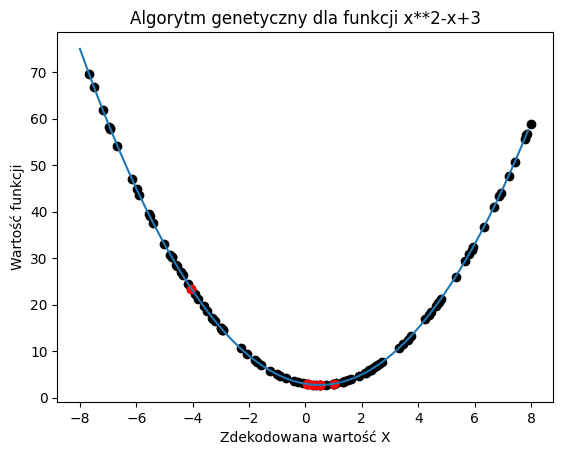

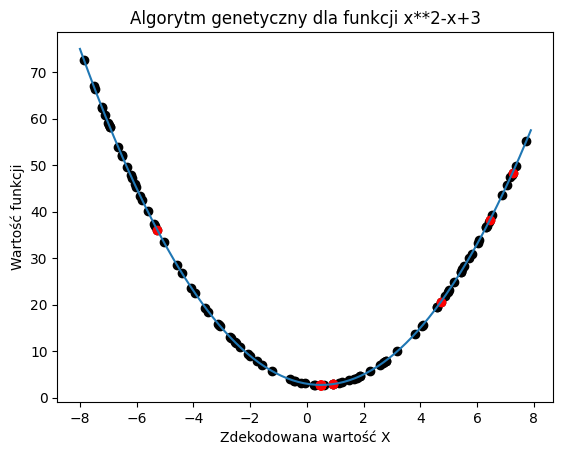

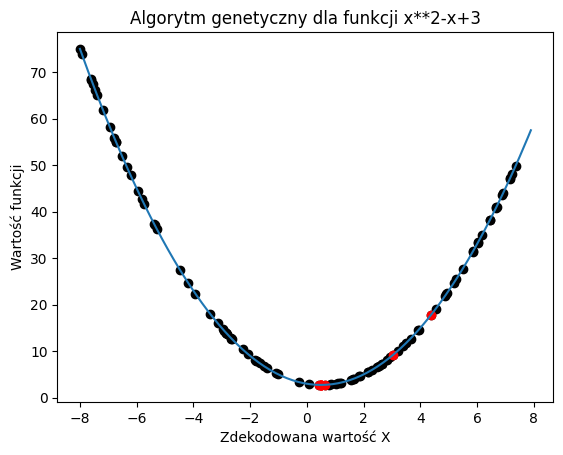

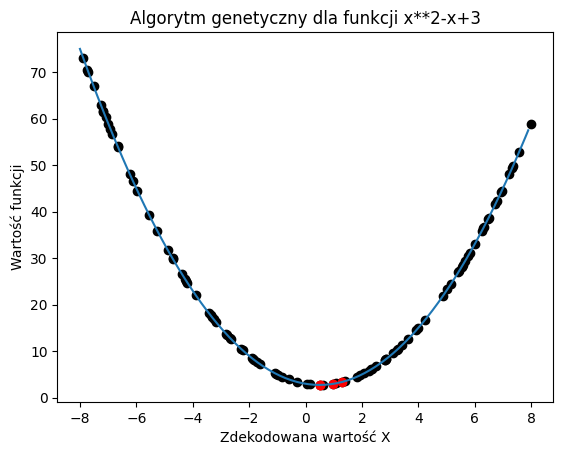

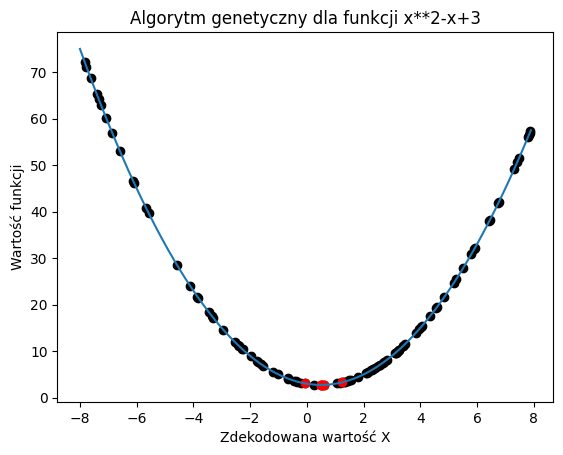

In [8]:
granice =[-8,8]
ilosc_iteracji_tab = [10,50,100,250,400]
ilosc_bitow = 16
ilosc_populacji = 100
krzyzowanie_hiperparametr = 0.9
mutacja_hiperparametr =0.4
for ilosc_iteracji in ilosc_iteracji_tab:
    najlepszy,wynik = algorytm_genetyczny(input_function,granice,ilosc_bitow,ilosc_iteracji,ilosc_populacji,krzyzowanie_hiperparametr,mutacja_hiperparametr)
    print(f'Najlepszy wynik dla iteracji {ilosc_iteracji}')
    decoded = dekodowanie(granice, ilosc_bitow, najlepszy)
    print('f(%s) = %f' % (decoded[0], wynik))

# Zmiana parametru krzyzowania

[[1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1], [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0], [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1], [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0], [1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1], [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1], [1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], [0, 0, 0, 0, 0, 1, 

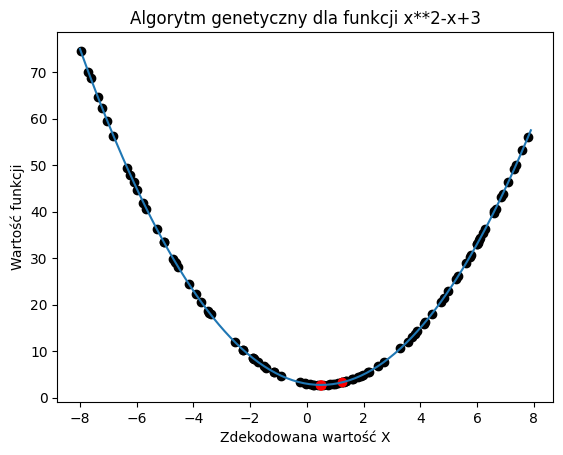

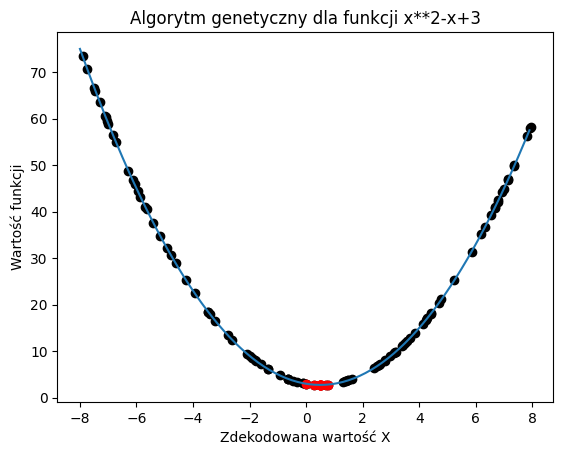

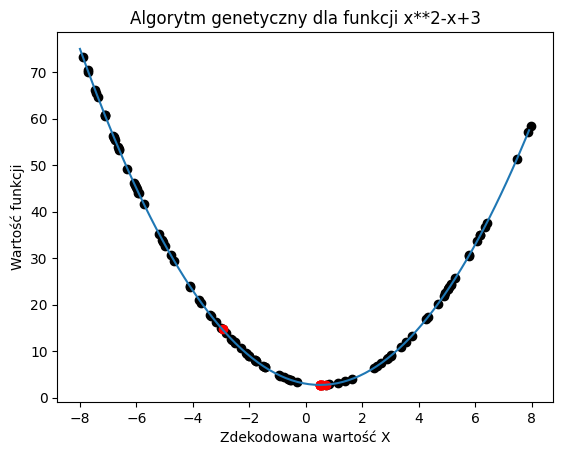

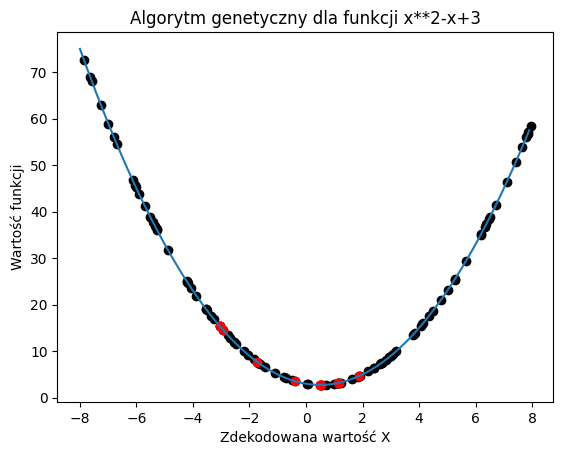

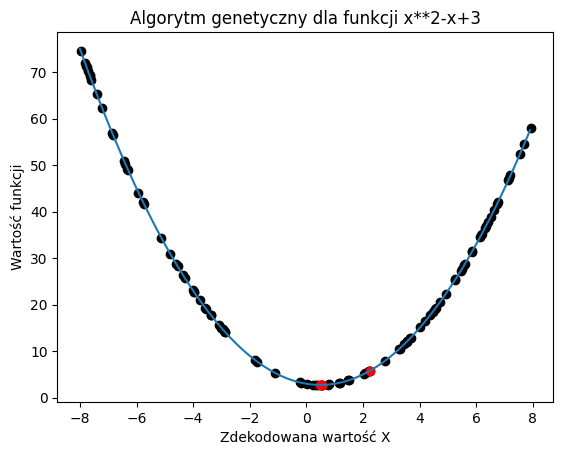

In [9]:
granice =[-8,8]
ilosc_iteracji = 100
ilosc_bitow = 16
ilosc_populacji = 100
krzyzowanie_hiperparametr_tab = [0.05,0.25,0.45,0.65,0.85]
mutacja_hiperparametr =0.4
for krzyzowanie_hiperparametr in krzyzowanie_hiperparametr_tab:
    najlepszy,wynik = algorytm_genetyczny(input_function,granice,ilosc_bitow,ilosc_iteracji,ilosc_populacji,krzyzowanie_hiperparametr,mutacja_hiperparametr)
    print(f'Najlepszy wynik dla hiperparametru krzyzowania {krzyzowanie_hiperparametr}')
    decoded = dekodowanie(granice, ilosc_bitow, najlepszy)
    print('f(%s) = %f' % (decoded[0], wynik))

## Zmiana populacji początkowej

[[1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1], [0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1], [0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1], [0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1], [0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0], [0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1], [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1], [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0]]
Generacja: 0 Najlep

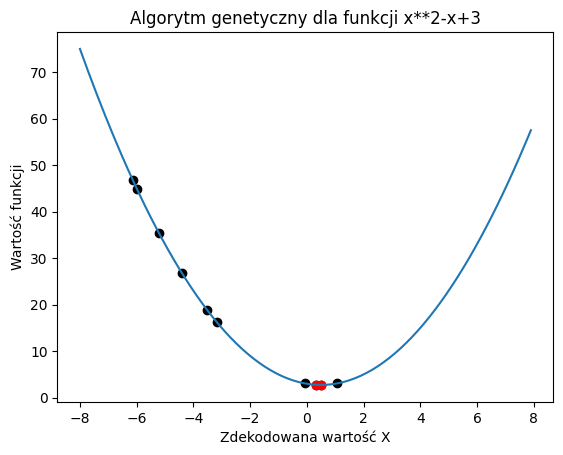

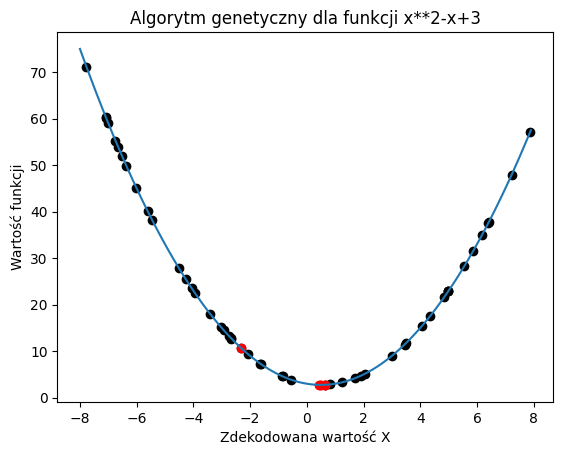

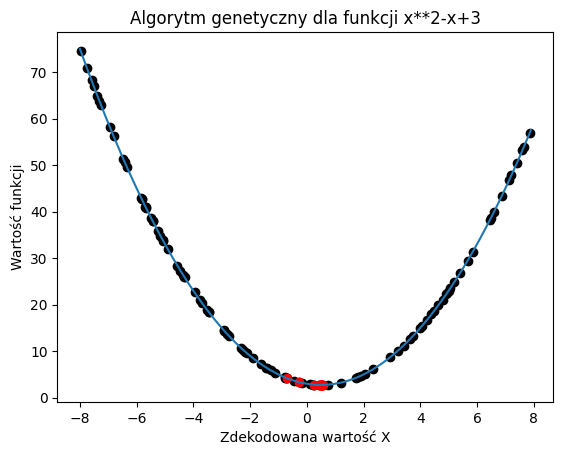

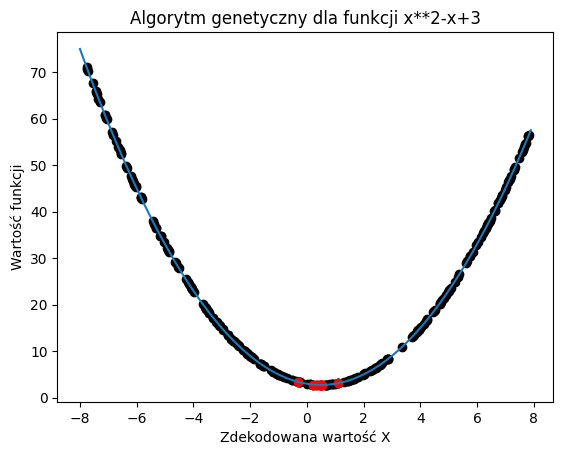

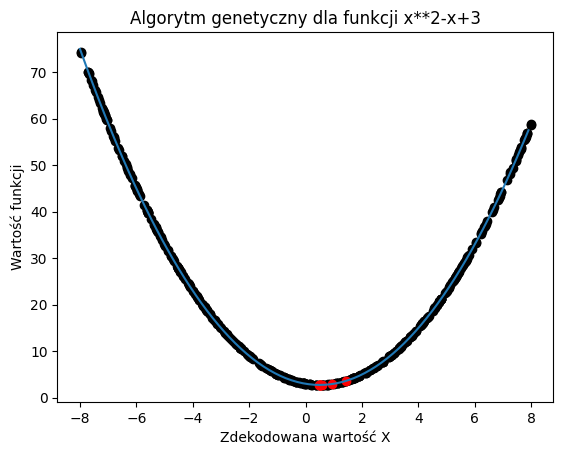

In [10]:
granice =[-8,8]
ilosc_iteracji = 100
ilosc_bitow = 16
ilosc_populacji_tab = [10,50,100,250,400]
krzyzowanie_hiperparametr = 0.9
mutacja_hiperparametr =0.4
for ilosc_populacji in ilosc_populacji_tab:
    najlepszy,wynik = algorytm_genetyczny(input_function,granice,ilosc_bitow,ilosc_iteracji,ilosc_populacji,krzyzowanie_hiperparametr,mutacja_hiperparametr)
    print(f'Najlepszy wynik dla populacji {ilosc_populacji}')
    decoded = dekodowanie(granice, ilosc_bitow, najlepszy)
    print('f(%s) = %f' % (decoded[0], wynik))

### współczynnik mutacji

[[1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0], [1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1], [1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0], [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1], [1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0], [1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0], [1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1], [0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1], [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0], [0, 1, 0, 0, 1, 0, 

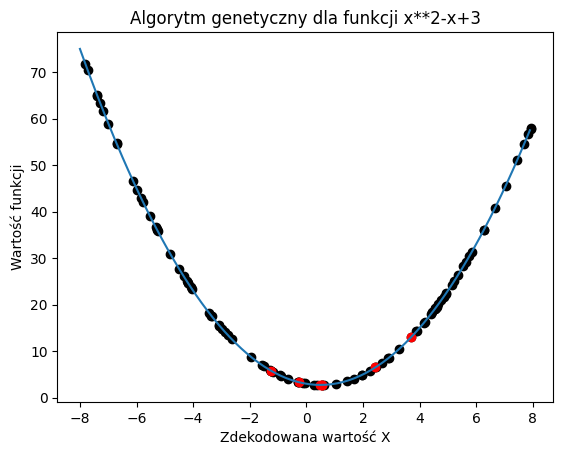

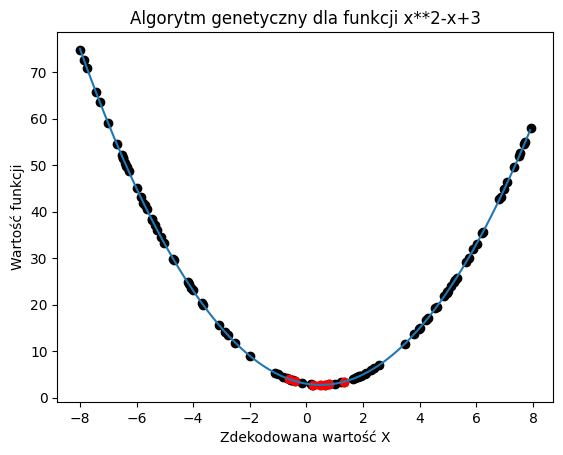

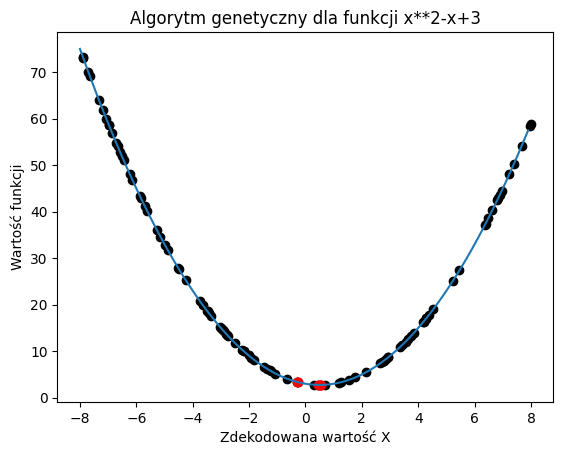

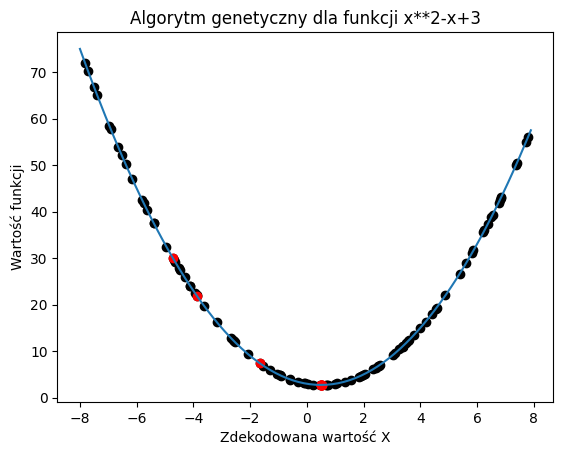

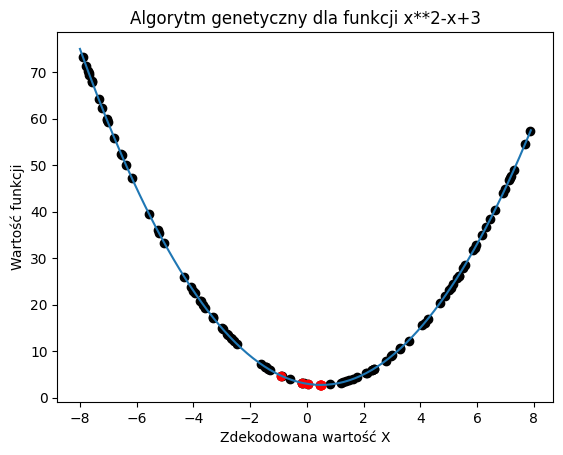

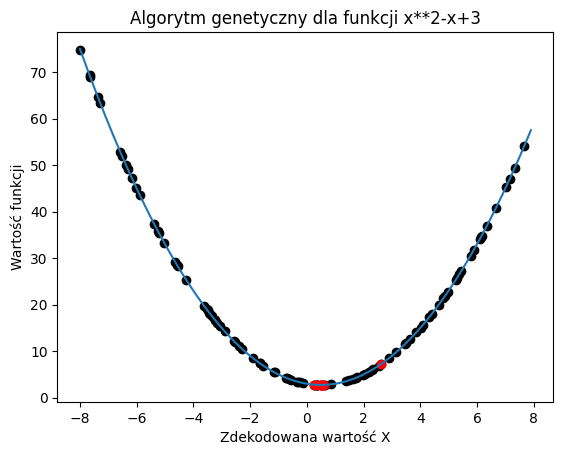

In [11]:
granice =[-8,8]
ilosc_iteracji = 100
ilosc_bitow = 16
ilosc_populacji = 100
krzyzowanie_hiperparametr = 0.9
mutacja_hiperparametr_tab = [0.01,0.05,0.25,0.45,0.65,0.85]
for mutacja_hiperparametr in mutacja_hiperparametr_tab:
    najlepszy,wynik = algorytm_genetyczny(input_function,granice,ilosc_bitow,ilosc_iteracji,ilosc_populacji,krzyzowanie_hiperparametr,mutacja_hiperparametr)
    print(f'Najlepszy wynik dla współczynnika mutacji {mutacja_hiperparametr}')
    decoded = dekodowanie(granice, ilosc_bitow, najlepszy)
    print('f(%s) = %f' % (decoded[0], wynik))

## Wpływ dlugości chromosomów

[[0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1], [1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0], [1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0], [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1], [1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1], [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1], [0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1], [1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1], [1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1], [0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0], [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1], [1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1], [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0], [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0], [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], [1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0],

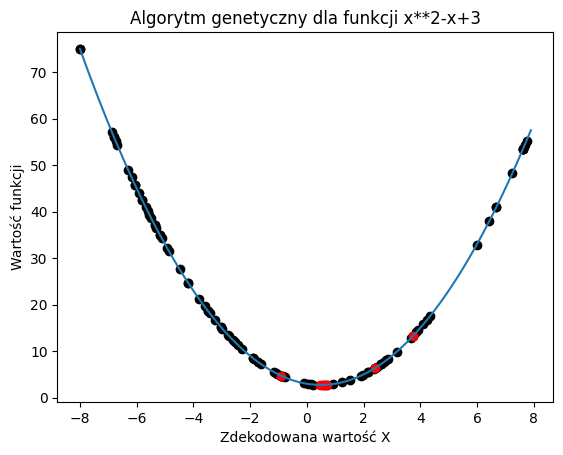

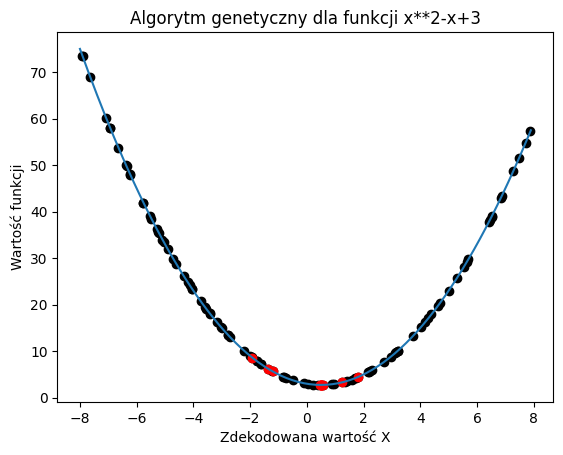

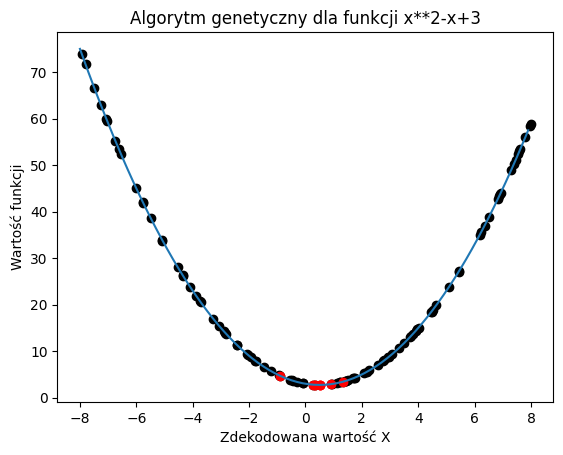

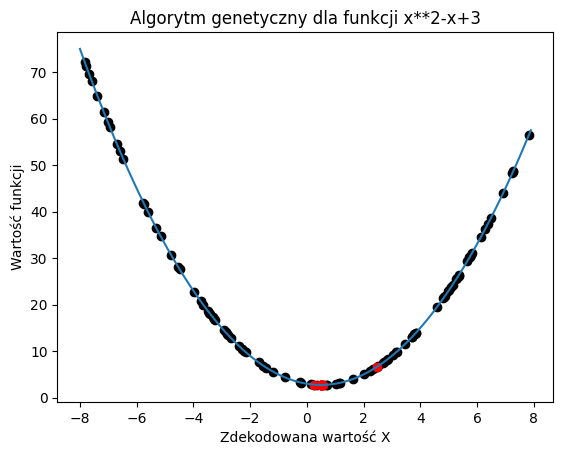

In [12]:
granice =[-8,8]
ilosc_iteracji_tab = 100
ilosc_bitow_tab= [8,16,32,64]
ilosc_populacji = 100
krzyzowanie_hiperparametr = 0.9
mutacja_hiperparametr =0.4
for ilosc_bitow in ilosc_bitow_tab:
    najlepszy,wynik = algorytm_genetyczny(input_function,granice,ilosc_bitow,ilosc_iteracji,ilosc_populacji,krzyzowanie_hiperparametr,mutacja_hiperparametr)
    print(f'Najlepszy wynik dla chromosomu o długości {ilosc_bitow}')
    decoded = dekodowanie(granice, ilosc_bitow, najlepszy)
    print('f(%s) = %f' % (decoded[0], wynik))